In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['species'] = iris.target

print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


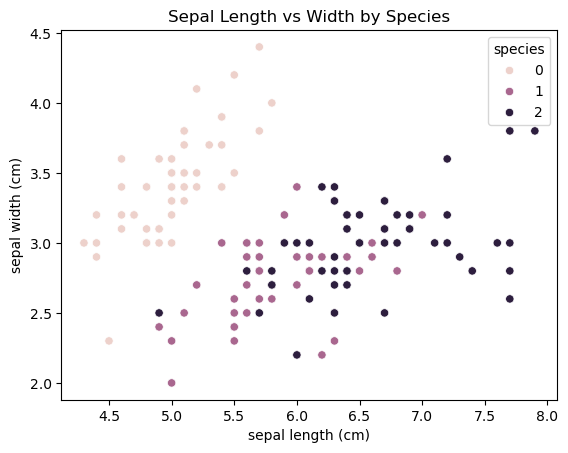

In [74]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'species' , data = data)
plt.title("Sepal Length vs Width by Species")
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 , random_state = 42)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Accuracy:" , accuracy_score(y_test,predictions))

Accuracy: 1.0


In [79]:
# Data Preprocessing on iris

In [169]:
import numpy as np

data_with_missing = data.copy()
data_with_missing.iloc[np.random.randint(0,150,5),0] =  None 
print('Data with missing values : \n', data_with_missing)

data_with_missing['sepal length (cm)'] = data_with_missing['sepal length (cm)'].fillna(data_with_missing['sepal length (cm)'].mean())
print('\nData after filling missing values: \n ',data_with_missing.head(10))

Data with missing values : 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

In [171]:
data2 = data_with_missing.copy()
X1 = data2.drop('species', axis=1)
y1 = data2['species']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

model1 = DecisionTreeClassifier()
model1.fit(X1_train, y1_train)
prediction1 = model1.predict(X1_test)
print('Data with missing values:', accuracy_score(prediction1,y1_test))

Data with missing values: 1.0


In [173]:
# KNN model for checking accuracy chnages
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(X1_train,y1_train)
prediction2 = model2.predict(X1_test)
print("KNN missing value accuracy: ", accuracy_score(prediction2,y1_test))

KNN missing value accuracy:  1.0


In [176]:
# Trying a new large dataset likw wine 

In [194]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
data_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
data_wine['target'] = wine.target
data_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [196]:
# let's introduce some none values to this wine dataset

data_wine_with_missing = data_wine.copy()
data_wine_with_missing.iloc[np.random.randint(0,len(data_wine),50),0] =None
data_wine_with_missing[wine.feature_names[0]] = data_wine_with_missing[wine.feature_names[0]].fillna(data_wine_with_missing[wine.feature_names[0]].mean())


In [200]:
# Split and train
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

X_wine = data_wine_with_missing.drop('target', axis=1)
y_wine = data_wine_with_missing['target']
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine_scaled, y_wine, test_size=0.3, random_state=42)

In [202]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_wine_train, y_wine_train)
pred_dt = model_dt.predict(X_wine_test)
print("Decision Tree Accuracy:", accuracy_score(y_wine_test, pred_dt))

Decision Tree Accuracy: 0.9444444444444444


In [204]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_wine_train, y_wine_train)
pred_knn = model_knn.predict(X_wine_test)
print("KNN Accuracy:", accuracy_score(y_wine_test, pred_knn))

KNN Accuracy: 0.9444444444444444
